In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)

In [253]:
data = pd.read_csv('realty_data.csv')

In [254]:
data.head(5)

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
0,"3-комнатная, 137 м²",NaN,63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,Квартира,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN,Просторная квартира свободной планировки с пан...,ЦИАН
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
2,"3-комнатная, 76 м²",NaN,16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,Квартира,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN,"Apт.1684018. 0,01% - гибкая ипотека! Воспользу...",Яндекс.Недвижимость
3,"1-комнатная, 24 м²",NaN,7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,Квартира,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN,Продается однокомнатная квартира № 381 в новос...,Новострой-М
4,"3-комнатная, 126 м²",NaN,120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,Квартира,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN,Шикарное предложение!\nПродаётся трёхкомнатная...,Домклик


In [255]:
print('Числовые признаки')
print(data.describe())
print()
print()
print('Категориальные признаки')
print(data.describe(exclude=[np.number]))

Числовые признаки
       period         price       postcode           lat           lon  \
count     0.0  9.882200e+04   93675.000000  98822.000000  98822.000000   
mean      NaN  2.512122e+07  124503.585119     55.742691     37.586404   
std       NaN  3.607234e+07   11956.742109      0.107044      0.169843   
min       NaN  1.900000e+06  101000.000000     55.468426     37.136489   
25%       NaN  1.050000e+07  115516.000000     55.673101     37.471611   
50%       NaN  1.516713e+07  123154.000000     55.745474     37.569365   
75%       NaN  2.500000e+07  140003.000000     55.817697     37.689568   
max       NaN  1.155219e+09  143989.000000     56.028824     38.122467   

       total_square         rooms         floor  
count  98822.000000  94840.000000  98822.000000  
mean      66.092176      2.197427      9.905274  
std       48.816204      1.038628      8.219180  
min        8.000000      1.000000      1.000000  
25%       40.100000      1.000000      4.000000  
50%       56.40

Из описания столбцов видно, что признак Period не заполнен, а признак Object_type имеет лишь одно значение. Исключим их из датасета, чтобы не загромождать модель лишними фичами.

In [256]:
data.drop(['period', 'object_type'], axis = 1, inplace = True)

In [257]:
data.isna().any()

product_name    False
price           False
postcode         True
address_name     True
lat             False
lon             False
total_square    False
rooms            True
floor           False
city             True
settlement       True
district         True
area             True
description      True
source          False
dtype: bool

Теперь избавимся от полных дубликатов.

In [258]:
data_check = data.drop(['price'], axis = 1)
print('Число дубликатов в датасете равно ',len(data_check)-len(data_check.drop_duplicates()))

Число дубликатов в датасете равно  474


In [260]:
data_check.loc[data_check.duplicated(), :]

,product_name,postcode,address_name,lat,lon,total_square,rooms,floor,city,settlement,district,area,description,source
3922,"1-комнатная, 33 м²",109052.0,"Рязанский проспект, 2/1 к2г",55.728532,37.737600,33.00,1.0,24.0,Москва,NaN,Нижегородский район,NaN,ЖК «Аквилон BESIDE» — масштабный проект от «ра...,Яндекс.Недвижимость
3981,"3-комнатная, 109,9 м²",123290.0,"Шмитовский проезд, 39 к1",55.754026,37.523352,109.90,3.0,2.0,Москва,NaN,Пресненский район,NaN,КВАРТИРА В ХОРОШЕВО-МНЕВНИКАХ! ДОМ СДАН!\n\nТр...,Домклик
6865,"2-комнатная, 57,9 м²",109316.0,"Волгоградский проспект, вл32/5 к3",55.719525,37.690231,57.90,2.0,5.0,Москва,NaN,Южнопортовый район,NaN,Продаётся 2-комнатная квартира в строящемся до...,ЦИАН
6959,"Студия, 20 м²",109052.0,"Рязанский проспект, 2/1 к2г",55.728532,37.737600,20.00,1.0,24.0,Москва,NaN,Нижегородский район,NaN,ЖК «Аквилон BESIDE» — масштабный проект от «ра...,Яндекс.Недвижимость
7591,"Студия, 20 м²",109052.0,"Рязанский проспект, 2/1 к2г",55.728532,37.737600,20.00,1.0,23.0,Москва,NaN,Нижегородский район,NaN,ЖК «Аквилон BESIDE» — масштабный проект от «ра...,Яндекс.Недвижимость
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98182,"3-комнатная, 108,3 м²",129594.0,"Марьиной Рощи 4-я, вл12/2",55.797873,37.625361,108.28,3.0,46.0,Москва,NaN,Марьина Роща район,NaN,Прямая продажа жилого комплекса премиум-класса...,ЦИАН
98237,"2-комнатная, 57 м²",127273.0,"Отрадная, 4а",55.857965,37.605841,57.00,2.0,18.0,Москва,NaN,Отрадное район,NaN,Прямая продажа от застройщика.Продаётся 2-к кв...,Яндекс.Недвижимость
98390,"3-комнатная, 71 м²",121609.0,"Осенний бульвар, 2",55.752349,37.410339,71.00,3.0,10.0,Москва,NaN,Крылатское район,NaN,"Внимание! Свободная продажа, выписка до сделки...",ЦИАН
98468,"2-комнатная, 68,5 м²",108818.0,"микрорайон Новые Ватутинки Центральные, к9/1/1.2",55.517482,37.340124,68.50,2.0,9.0,Москва,NaN,Десёновское поселение,Новые Ватутинки Центральный микрорайон жилой к...,Продаётся 2-комнатная квартира в строящемся до...,ЦИАН


In [261]:
ind_del = list(data_check.loc[data_check.duplicated(), :].index)
data.drop(index = ind_del, axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)
print(data)

               product_name      price  postcode  \
0       3-комнатная, 137 м²   63000000  127473.0   
1           Студия, 16,7 м²    3250000  108815.0   
2        3-комнатная, 76 м²   16004680       NaN   
3        1-комнатная, 24 м²    7841776       NaN   
4       3-комнатная, 126 м²  120000000  121352.0   
...                     ...        ...       ...   
98343    2-комнатная, 42 м²   12183528  125212.0   
98344  2-комнатная, 63,5 м²   34925000  129090.0   
98345  1-комнатная, 34,4 м²   10000000  117534.0   
98346    3-комнатная, 56 м²   15999000  109518.0   
98347  2-комнатная, 55,1 м²   16750000  109316.0   

                          address_name        lat        lon  total_square  \
0         2-й Щемиловский переулок, 5а  55.778894  37.608844         137.0   
1                      Харлампиева, 46  55.551025  37.313054          16.7   
2                    ЖК Прокшино, 8 к4  55.594802  37.431264          76.0   
3                    ЖК Прокшино, 6 к2  55.594332  37.428099   

In [262]:
print(data.iloc[1])

product_name                                      Студия, 16,7 м²
price                                                     3250000
postcode                                                 108815.0
address_name                                      Харлампиева, 46
lat                                                     55.551025
lon                                                     37.313054
total_square                                                 16.7
rooms                                                         NaN
floor                                                         1.0
city                                                       Москва
settlement                                                    NaN
district                                 Филимонковское поселение
area                                                          NaN
description                ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...
source                                                    Домклик
Name: 1, d

Не могу оценить даже косвенное влияние признака Source на нашу переменную, поэтому отложим его до лучших времен. Признак description также пока что отложим, так как он требует основательной предобработки для использования в модели.

In [263]:
data_new = data.drop(['source', 'description'], axis = 1)

In [264]:
data_new.head(5)

,product_name,price,postcode,address_name,lat,lon,total_square,rooms,floor,city,settlement,district,area
0,"3-комнатная, 137 м²",63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN
1,"Студия, 16,7 м²",3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN
2,"3-комнатная, 76 м²",16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN
3,"1-комнатная, 24 м²",7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN
4,"3-комнатная, 126 м²",120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN


Снова уберем дубликаты.

In [266]:
data_check = data_new.drop(['price'], axis = 1)

print('Число дубликатов в датасете равно ',len(data_check)-len(data_check.drop_duplicates()))

Число дубликатов в датасете равно  6104


In [267]:
data_check.loc[data_check.duplicated(), :]

,product_name,postcode,address_name,lat,lon,total_square,rooms,floor,city,settlement,district,area
605,"2-комнатная, 62 м²",127018.0,"Складочная улица, 6 к8",55.801423,37.596985,62.0,2.0,5.0,Москва,NaN,Марьина Роща район,NaN
955,"2-комнатная, 47,6 м²",125167.0,"Ленинградский проспект, 37/3",55.793036,37.542115,47.6,2.0,37.0,Москва,NaN,Хорошёвский район,NaN
1583,"3-комнатная, 142,6 м²",109028.0,"Казарменный переулок, 3",55.757184,37.649684,142.6,3.0,8.0,Москва,NaN,Басманный район,NaN
1695,"3-комнатная, 82 м²",141009.0,"Олимпийский проспект, 12",55.917186,37.770422,82.0,3.0,17.0,Мытищи,NaN,NaN,NaN
1790,"1-комнатная, 40 м²",125130.0,"Старопетровский проезд, 8",55.822748,37.505632,40.0,1.0,4.0,Москва,NaN,Войковский район,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
98303,"3-комнатная, 77 м²",121359.0,"Бобруйская, 15/1",55.738107,37.397033,77.0,3.0,10.0,Москва,NaN,Кунцево район,NaN
98307,"3-комнатная, 79,7 м²",121165.0,"улица Студенческая, 44/28 / Киевская, 28",55.739216,37.537754,79.7,3.0,1.0,Москва,NaN,Дорогомилово район,NaN
98323,"4-комнатная, 168 м²",109028.0,"Казарменный переулок, 3",55.757184,37.649684,168.0,4.0,8.0,Москва,NaN,Басманный район,NaN
98326,"2-комнатная, 52 м²",119607.0,"Мичуринский проспект, 29 к3",55.693549,37.505523,52.0,2.0,9.0,Москва,NaN,Раменки район,NaN


In [268]:
ind_del = list(data_check.loc[data_check.duplicated(), :].index)
data_new.drop(index = ind_del, axis = 0, inplace = True)
data_new.reset_index(drop = True, inplace = True)
print(data_new)

               product_name      price  postcode  \
0       3-комнатная, 137 м²   63000000  127473.0   
1           Студия, 16,7 м²    3250000  108815.0   
2        3-комнатная, 76 м²   16004680       NaN   
3        1-комнатная, 24 м²    7841776       NaN   
4       3-комнатная, 126 м²  120000000  121352.0   
...                     ...        ...       ...   
92239    2-комнатная, 42 м²   12183528  125212.0   
92240  2-комнатная, 63,5 м²   34925000  129090.0   
92241  1-комнатная, 34,4 м²   10000000  117534.0   
92242    3-комнатная, 56 м²   15999000  109518.0   
92243  2-комнатная, 55,1 м²   16750000  109316.0   

                          address_name        lat        lon  total_square  \
0         2-й Щемиловский переулок, 5а  55.778894  37.608844         137.0   
1                      Харлампиева, 46  55.551025  37.313054          16.7   
2                    ЖК Прокшино, 8 к4  55.594802  37.431264          76.0   
3                    ЖК Прокшино, 6 к2  55.594332  37.428099   

In [269]:
data_new.isna().any()

product_name    False
price           False
postcode         True
address_name     True
lat             False
lon             False
total_square    False
rooms            True
floor           False
city             True
settlement       True
district         True
area             True
dtype: bool

In [270]:
print('Числовые признаки')
print(data_new.describe())
print()
print()
print('Категориальные признаки')
print(data_new.describe(exclude=[np.number]))

Числовые признаки
              price       postcode           lat           lon  total_square  \
count  9.224400e+04   87537.000000  92244.000000  92244.000000  92244.000000   
mean   2.480675e+07  124561.511669     55.742728     37.586886     65.898554   
std    3.568570e+07   12003.710536      0.107548      0.170677     48.413503   
min    1.900000e+06  101000.000000     55.468426     37.136489      8.000000   
25%    1.050000e+07  115487.000000     55.672603     37.471706     40.400000   
50%    1.510523e+07  123182.000000     55.745800     37.569733     56.400000   
75%    2.493985e+07  140007.000000     55.818062     37.690065     75.600000   
max    1.155219e+09  143989.000000     56.028824     38.122467   2070.000000   

              rooms         floor  
count  88528.000000  92244.000000  
mean       2.196932      9.890963  
std        1.034128      8.198033  
min        1.000000      1.000000  
25%        1.000000      4.000000  
50%        2.000000      8.000000  
75%      

Оценим, где больше всего пропущенных значений и в каких соотношениях они пропущены:

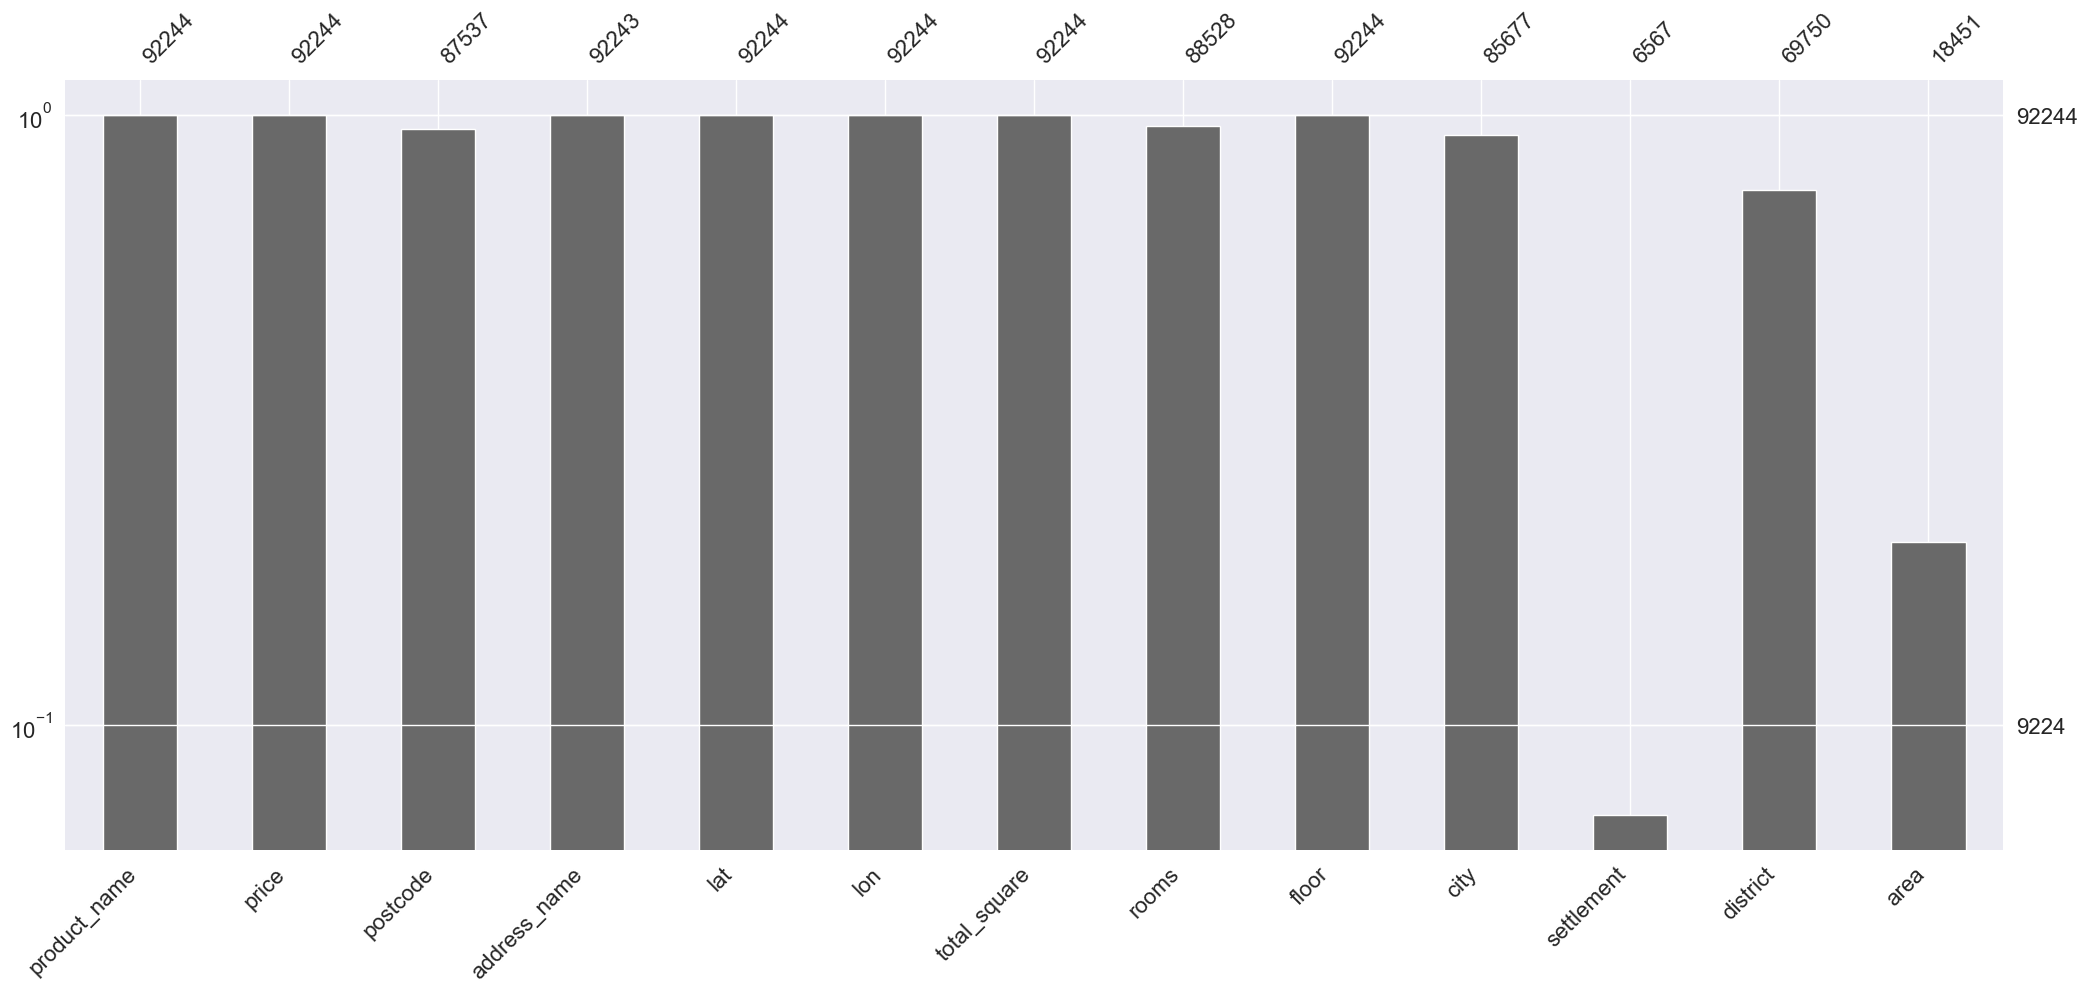

In [272]:
import missingno as msno
msno.bar(data_new, log = True)
plt.show()

Похоже признаки city и settlement можно схлопнуть в один, что в принципе логично. Проверим, можем ли мы так сделать.

In [273]:
cit = data_new['city'].unique().tolist()
print(cit)

['Москва', nan, 'Балашиха', 'Люберцы', 'Красногорск', 'Химки', 'Королёв', 'Мытищи', 'Пушкино', 'Котельники', 'Одинцово', 'Щёлково', 'Дзержинский', 'Реутов', 'Ивантеевка', 'Московский', 'Лобня', 'Долгопрудный', 'Щербинка', 'Подольск', 'Видное', 'Лыткарино']


In [274]:
for i in cit:
    data_c = data_new.loc[data_new['city'] == i]  
    print('Город ', i, ' и уникальные поселения')
    print(data_c['settlement'].unique())
    print("------------------------")

Город  Москва  и уникальные поселения
[nan]
------------------------
Город  nan  и уникальные поселения
[]
------------------------
Город  Балашиха  и уникальные поселения
[nan]
------------------------
Город  Люберцы  и уникальные поселения
[nan]
------------------------
Город  Красногорск  и уникальные поселения
[nan]
------------------------
Город  Химки  и уникальные поселения
[nan]
------------------------
Город  Королёв  и уникальные поселения
[nan]
------------------------
Город  Мытищи  и уникальные поселения
[nan]
------------------------
Город  Пушкино  и уникальные поселения
[nan]
------------------------
Город  Котельники  и уникальные поселения
[nan]
------------------------
Город  Одинцово  и уникальные поселения
[nan]
------------------------
Город  Щёлково  и уникальные поселения
[nan]
------------------------
Город  Дзержинский  и уникальные поселения
[nan]
------------------------
Город  Реутов  и уникальные поселения
[nan]
------------------------
Город  Ивантеевка  

Действительно можно, так и сделаем.

In [276]:
data_new['settlement'].fillna('', inplace=True)
data_new['city'].fillna('', inplace=True)
data_new['locality'] = data_new['city']+ data_new['settlement']
print(data_new['locality'].unique())

['Москва' 'д.\xa0Мисайлово' 'Балашиха' 'пос.\xa0ВНИИССОК' 'Люберцы'
 'Красногорск' 'Химки' 'Королёв' 'Мытищи' 'рп.\xa0Дрожжино'
 'рп.\xa0Октябрьский' 'с.\xa0Немчиновка' 'Пушкино' 'Котельники' 'Одинцово'
 'рп.\xa0Новоивановское' 'Щёлково' 'пос.\xa0Ильинское-Усово' 'Дзержинский'
 'Реутов' 'рп.\xa0Томилино' 'рп.\xa0Боброво' 'с.\xa0Домодедово'
 'Ивантеевка' 'Московский' 'пос.\xa0Мебельной фабрики' 'д.\xa0Путилково'
 'Лобня' 'Долгопрудный' 'пос.\xa0Развилка' 'д.\xa0Островцы'
 'д.\xa0Большие Жеребцы' 'Щербинка' 'пос.\xa0Коммунарка' 'д.\xa0Раздоры'
 'д.\xa0Мотяково' 'пос.\xa0Нагорное' 'Подольск' 'пос.\xa0Марьино'
 'дп.\xa0Красково' 'рп.\xa0Лопатино' 'д.\xa0Сосенки' 'пос.\xa0Битца'
 'рп.\xa0Заречье' 'с.\xa0Ромашково' 'Видное' 'д.\xa0Жабкино'
 'д.\xa0Сапроново' 'пос.\xa0Отрадное' 'дп.\xa0Лесной Городок'
 'д.\xa0Мякинино' 'рп.\xa0Нахабино' 'д.\xa0Сабурово'
 'с.\xa0Николо-Урюпино' 'пос.\xa0Мирный'
 'пос.\xa0подсобного хозяйства "Воскресенское"' 'с.\xa0Молоково'
 'д.\xa0Глухово' 'д.\xa0Пирогово' '

Посмотрим, что там может дать product_name и где в rooms пропущены значения

In [278]:
data_new[['apartment_type', 'square_meters']] = data_new.product_name.str.split(",", 1, expand = True)
print(data_new['apartment_type'].unique())

['3-комнатная' 'Студия' '1-комнатная' '2-комнатная' '4-комнатная'
 '5-комнатная' 'Квартира' '6-комнатная' '10-комнатная' '7-комнатная'
 '11-комнатная' '8-комнатная' '9-комнатная' '12-комнатная' '14-комнатная'
 '15-комнатная' '13-комнатная']


In [279]:
data_stud = data_new.loc[data_new['apartment_type'] == 'Студия'] 
print(data_stud['rooms'].unique())

[nan  1.]


In [280]:
data_apart = data_new.loc[data_new['apartment_type'] == 'Квартира'] 
print(data_apart['rooms'].unique())

[nan]


In [281]:
print(data_apart.describe())
print(data_stud.describe())

              price       postcode         lat         lon  total_square  \
count  6.470000e+02     643.000000  647.000000  647.000000    647.000000   
mean   4.660089e+07  121364.618974   55.760918   37.577464     84.165781   
std    7.474956e+07    7107.704006    0.057758    0.084824    119.195024   
min    3.450000e+06  101000.000000   55.549916   37.258162     12.500000   
25%    1.430000e+07  117370.000000   55.721730   37.524554     30.000000   
50%    2.010620e+07  121374.000000   55.758874   37.581175     38.000000   
75%    4.240000e+07  127163.000000   55.806111   37.636345     85.000000   
max    7.861048e+08  143962.000000   55.946070   37.939348   1157.100000   

       rooms       floor  
count    0.0  647.000000  
mean     NaN   13.420402  
std      NaN   11.682437  
min      NaN    1.000000  
25%      NaN    4.000000  
50%      NaN    9.000000  
75%      NaN   20.000000  
max      NaN   52.000000  
              price       postcode          lat          lon  total_squa

Испольуем далее полученный признак apartment_type, так как на сайтах фильтр 'Студия' идет наравне с количеством комнат

Заполним пропуски:

In [282]:
for col in data_new.columns:
    mod = data_new[col].mode()
    data_new[col] = data_new[col].fillna(value = mod[0])

In [283]:
data_new.isna().any()

product_name      False
price             False
postcode          False
address_name      False
lat               False
lon               False
total_square      False
rooms             False
floor             False
city              False
settlement        False
district          False
area              False
locality          False
apartment_type    False
square_meters     False
dtype: bool

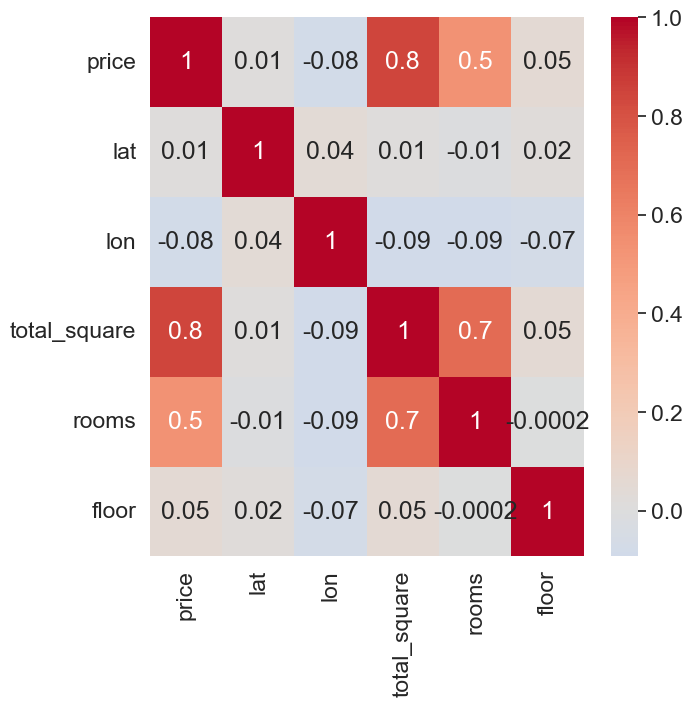

In [233]:
corr_matrix = data_new[['price','lat', 'lon', 'total_square', 'rooms', 'floor']].corr()
plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix,cmap='coolwarm',
            center = 0, 
            annot=True,
            fmt='.1g')
plt.show()

Из тепловой карты видно, что сильнее всего из чиловых признаков с целевой переменной коррелирует признаки total_square и rooms

Построим модель только на числовых признаках (вдруг там уже будет супер качество).

In [285]:
data_new_number = data_new[['lat', 'lon', 'total_square', 'rooms', 'floor']]
ans_data_new_number = data_new['price']
X_train, X_test, y_train, y_test = train_test_split(data_new_number, ans_data_new_number, test_size=0.3)

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred))
print("MSE: ", MSE(y_test, pred))

Test metrics:
R2 score:  0.7298376584416769
MSE:  370533281400267.8


Неплохо, но давайте стандартизируем фичи

In [287]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

scal.fit(X_train)
X_train_tr = pd.DataFrame(scal.transform(X_train))
X_test_tr = pd.DataFrame(scal.transform(X_test))

lr_reg_tr = LinearRegression()
lr_reg_tr.fit(X_train_tr, y_train)
pred_tr = lr_reg_tr.predict(X_test_tr)
print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_tr))
print("MSE: ",MSE(y_test, pred_tr))

Test metrics:
R2 score:  0.7298376584416768
MSE:  370533281400267.94


Не особо помогло. Попробуем теперь Лассо-регрессию, чтобы посмотреть, можем мы сможем избавиться от лишних признаков.

In [289]:
from sklearn.linear_model import Lasso

lr_reg_l1 = Lasso()

lr_reg_l1.fit(X_train_tr, y_train)

pred_l1 = lr_reg_l1.predict(X_test_tr)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l1))
print("MSE: ",MSE(y_test, pred_l1))

print(lr_reg_l1.coef_)

Test metrics:
R2 score:  0.7298376543838303
MSE:  370533286965688.94
[   68335.0370194   -459366.22575613 32777581.58248551 -4322567.2203006
   106322.98855408]


Как-то не очень получилось. Тогда займемся подбором гиперпараметров.

In [291]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000, 50000]}
Las = Lasso()
Las_grid = GridSearchCV(Las, param_grid = parameters, cv = 10)
Las_grid.fit(X_train_tr, y_train).best_params_
print(Las_grid.best_params_)

{'alpha': 50000}


In [293]:
lr_reg_l1 = Lasso(alpha = 50000)

lr_reg_l1.fit(X_train_tr, y_train)

pred_l1 = lr_reg_l1.predict(X_test_tr)
print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l1))
print("MSE: ",MSE(y_test, pred_l1))
print(lr_reg_l1.coef_)

Test metrics:
R2 score:  0.7296192415329077
MSE:  370832844742267.2
[ 2.16188792e+04 -4.08712829e+05  3.26134487e+07 -4.15262888e+06
  6.96543553e+04]


Судя по всему, эти параметры важны, поэтому оставим их и начнем добавлять категориальные фичи в нашу модель.

In [295]:
data_new_cat = data_new[['lat', 'lon', 'total_square', 'rooms', 'floor','apartment_type', 'district', 'locality']]
ans_data_new_cat = data_new['price']
X_train_cat, X_test_cat, y_train, y_test = train_test_split(data_new_cat, ans_data_new_cat, test_size=0.33)

In [296]:
X_train_cat.describe(include = 'object')

,apartment_type,district,locality
count,61803,61803,61803
unique,16,130,67
top,2-комнатная,Сосенское поселение,Москва
freq,21610,18007,45497


In [297]:
X_test_cat.describe(include = 'object')

,apartment_type,district,locality
count,30441,30441,30441
unique,13,129,67
top,2-комнатная,Сосенское поселение,Москва
freq,10572,8853,22401


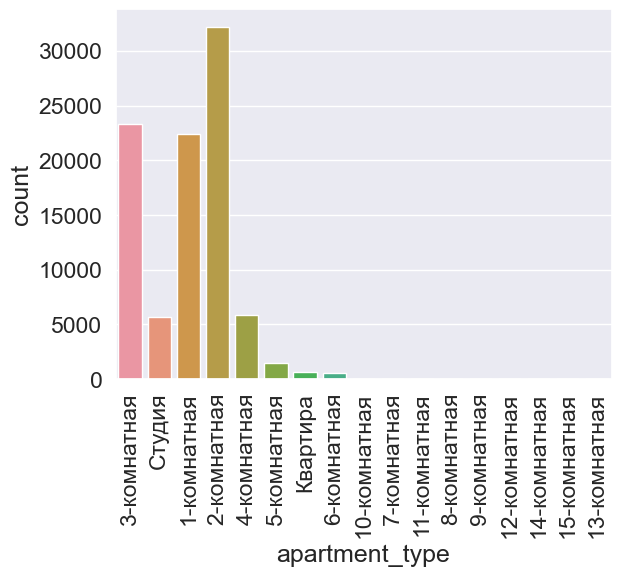

In [298]:
sns.countplot(data = data_new_cat, x = "apartment_type")
plt.xticks(rotation=90)
plt.show()

In [302]:
data_new_cat = data_new[['lat', 'lon', 'total_square', 'rooms', 'floor','apartment_type', 'district', 'locality', 'city']]
ans_data_new_cat = data_new['price']
conditions = [(data_new_cat['city'] == 'Москва'),
              (data_new_cat['city'] != 'Москва')]

values = [1, 0]
data_new_cat['Moscow'] = np.select(conditions, values)


data_new_cat_dummies = pd.get_dummies(data_new_cat, drop_first=True)

scal = StandardScaler()

scal.fit(data_new_cat_dummies)

data_new_cat_dummies_scaled = pd.DataFrame(scal.transform(data_new_cat_dummies), columns = data_new_cat_dummies.columns)
X_train_tr_cat, X_test_tr_cat, y_train, y_test = train_test_split(data_new_cat_dummies_scaled, ans_data_new_cat, test_size=0.3)

In [314]:
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

rid_reg = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
rid_reg_grid = GridSearchCV(rid_reg, param_grid = parameters, scoring = r2_score, cv = 10)
rid_reg_grid.fit(X_train_tr_cat, y_train).best_params_
print(rid_reg_grid.best_params_)

{'alpha': 0.0001}


In [313]:
lr_reg_l2 = Ridge(alpha = 0.0001)

lr_reg_l2.fit(X_train_tr_cat, y_train)

pred_l2 = lr_reg_l2.predict(X_test_tr_cat)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))

Test metrics:
R2 score:  0.7982480772409575
MSE:  222868705549038.62


Попробуем включить микрорайон в признаки

In [306]:
data_all = data_new[['lat', 'lon', 'total_square', 'rooms', 'floor','city', 'settlement', 'district', 'area']]
ans_data_all = data_new['price']

In [307]:
conditions = [(data_all['city'] == 'Москва'),
              (data_all['city'] != 'Москва')]

values = [1, 0]
data_all['Moscow'] = np.select(conditions, values)

data_all_fin = pd.get_dummies(data_all, drop_first=True)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data_all_fin, ans_data_all, test_size=0.3)

scal = StandardScaler()

scal.fit(X_train_all)
X_train_tr_all = pd.DataFrame(scal.transform(X_train_all), columns = X_train_all.columns)
X_test_tr_all = pd.DataFrame(scal.transform(X_test_all), columns = X_test_all.columns)

rid_reg = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
rid_reg_grid_all = GridSearchCV(rid_reg, param_grid = parameters, scoring = r2_score, cv = 10)
rid_reg_grid_all.fit(X_train_tr_all, y_train_all).best_params_
print(rid_reg_grid_all.best_params_)

{'alpha': 0.0001}


In [308]:
lr_reg_l2_all = Ridge(alpha = 0.0001)

lr_reg_l2_all.fit(X_train_tr_all, y_train_all)

pred_l2 = lr_reg_l2_all.predict(X_test_tr_all)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l2_all.predict(X_train_tr_all)))
print("MSE: ",MSE(y_train, lr_reg_l2_all.predict(X_train_tr_all)))

Test metrics:
R2 score:  -0.9891203344100716
MSE:  2197315733345962.8

Train metrics:
R2 score:  -0.7887201900936602
MSE:  2407199127822710.0


Коэффициент детерминации стал приближаться к -1, видимо с нашей моделью что-то не так:)

Значит все-таки имеет смысл либо переработать признак area в более полезный, либо исключить его из датасета, как мы и сделали выше. Воспользуемся нашей лучшей моделью.

In [309]:
pred_l2 = lr_reg_l2.predict(X_test_tr_cat)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))

Test metrics:
R2 score:  0.7982480772409575
MSE:  222868705549038.62


Далее пропишем кастомную метрику для заказчика:

In [310]:
def business_metrics(y_true, y_pred):
    kol_all = len(y_true)
    y_true1 = np.array(y_true)
    y_pred1 = np.array(y_pred)
    kol = 0
    for i in range(0, kol_all):
        dev = abs(y_true1[i] - y_pred1[i])
        per = dev / y_true1[i]
        if per > 0.3:
            kol += 1
    return (1 - kol/kol_all)
business_metrics(y_test, pred_l2)

0.619245501192455

Судя по бизнесовой метрике, мы можем интепретироват результаты для заказчика следующим образом - предсказания нашей модели в 62% случаях отличаются от реальных цен не более, чем на 30%. Для начала неплохо, но думаю, что можно улучшить этот показатель в дальнейшем. Например, использовать фичу description, поискав там словосочетания "вторичное жилье", "первичное жилье", "новостройка" и т.д., так как подобные признаки и фильтры есть на самих сайтах по типу ЦИАНа и др.